# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [12]:
from sklearn.svm import SVC
from itertools import combinations
from itertools import permutations
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import tree

In [26]:
# S_n is an array (n) x (d). In rows are point in R^d and there are n of them
def is_shattered(S):
    d = S.shape[1]
    n = S.shape[0]
    for i in range(1,n): 
        for j in combinations(np.arange(n),i):
            y = np.zeros(n)
            y[list(j)] = 1
            svc = svm.SVC(C=10000, shrinking=False, kernel='linear', tol=1e-4)
            if svc.fit(S, y).score(S, y) != 1:
                return False
    return True

In [28]:
df = np.array([[5,8],[1,3],[2,5]])
is_shattered(df)

True

### c)

In [42]:
# there should be 2^n = 2^4 = 16 pictures 
# (or 8 if you don't differentiate class swithes, 
# or 8-1=7 if you don't take into account the case in which all observations belongs to one class)

In [43]:
S = np.random.randn(8).reshape(4,2)
S

array([[ 0.70106272, -0.25547604],
       [-0.10504279, -0.7420331 ],
       [-0.06443415, -0.1628657 ],
       [-0.51487259, -0.26496976]])

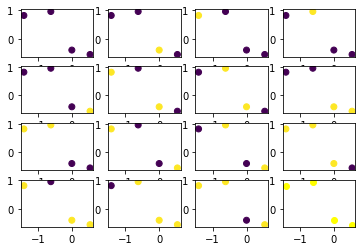

In [45]:
S = np.random.randn(8).reshape(4,2)
k = 1
plt.subplot(4,4,k)
for i in range(4):
    for j in combinations(np.arange(4),i):
        y = np.zeros(4)
        y[list(j)] = 1
        plt.subplot(4,4,k)
        k += 1
        plt.scatter(S[:,0], S[:,1], c= y)
plt.subplot(4,4,k)
plt.scatter(S[:,0], S[:,1], c= "yellow")

### d)

In [54]:
VC = np.zeros(9)
for d in range(2,11):
    ns = np.arange(d + 2 - 3, d + 2 + 4)
    for n in ns:
        if n > 0:
            stop = 0
            for i in range(50):
                S = np.random.randn(d*n).reshape(n,d)
                if is_shattered(S):
                    VC[d-2] = n + 1
                    stop = 1
                    break
            if stop == 0:
                break

In [55]:
VC

array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

### e)

In [ ]:
# A hint: change a kernel in SVM